In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

In [ ]:
!dir

In [ ]:
img = Image.open("fsipwrv7fgkz.jpg")
draw = ImageDraw.Draw(img)
# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.truetype("times.ttf", 150)
# draw.text((x, y),"Sample Text",(r,g,b))
draw.text((0, 0),"Sample Text",(255,255,255),font=font)
img.save('sample-out.jpg')

# How do we Determine BPM for a Song?

In [1]:
import librosa

In [ ]:
librosa.beat.beat_track()
librosa.beat.tempo()

In [ ]:
y, sr = librosa.load(librosa.util.example_audio_file())

In [ ]:
>>> # Estimate a static tempo
>>> y, sr = librosa.load(librosa.util.example_audio_file())
>>> onset_env = librosa.onset.onset_strength(y, sr=sr)
>>> tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
>>> tempo
array([129.199])

In [2]:
# Beat tracking example
from __future__ import print_function
import librosa


In [6]:
filename = librosa.util.example_audio_file()

In [7]:
filename

'C:\\Users\\bisedab\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\librosa\\util\\example_data\\Kevin_MacLeod_-_Vibe_Ace.ogg'

In [4]:
y, sr = librosa.load(filename)

In [10]:
filename = "C:\\Users\\bisedab\\Desktop\\DDR_Deep_Learning\\FUCKABLE.mp3"
filename = "C:\\Users\\bisedab\\Desktop\\DDR_Deep_Learning\\DTR.mp3"

In [11]:
# Beat tracking example
from __future__ import print_function
import librosa

# 1. Get the file path to the included audio example
#filename = librosa.util.example_audio_file()

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print('Saving output to beat_times.csv')
librosa.output.times_csv('beat_times.csv', beat_times)

Estimated tempo: 112.35 beats per minute
Saving output to beat_times.csv


In [34]:
y, sr = librosa.load(filename)
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

In [35]:
tempo

array([112.34714674])

In [44]:
y, sr = librosa.load(filename)
onset_env = librosa.onset.onset_strength(y, sr=sr)#, units = "time")
dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, aggregate=None)

C:\Users\bisedab\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [45]:
dtempo

array([112.34714674, 112.34714674, 112.34714674, ..., 151.99908088,
       151.99908088, 151.99908088])

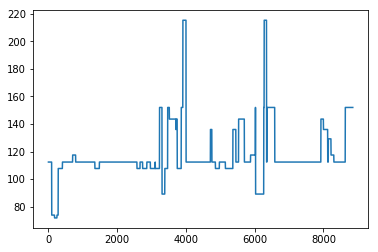

In [46]:
plt.plot(dtempo)

In [14]:
#librosa.onset.onset_detect(y=None, sr=22050, onset_envelope=None, hop_length=512, backtrack=False, energy=None, units='frames', **kwargs)

librosa.onset.onset_detect(y=y, units = "time")

array([1.62539683e-01, 6.96598639e-01, 1.23065760e+00, 1.50929705e+00,
       2.02013605e+00, 2.32199546e+00, 2.87927438e+00, 3.41333333e+00,
       3.66875283e+00, 4.50467120e+00, 4.76009070e+00, 5.03873016e+00,
       5.57278912e+00, 5.85142857e+00, 6.68734694e+00, 6.84988662e+00,
       7.22140590e+00, 7.75546485e+00, 7.89478458e+00, 8.56816327e+00,
       8.82358277e+00, 9.38086168e+00, 9.91492063e+00, 1.01703401e+01,
       1.07043991e+01, 1.09830385e+01, 1.13545578e+01, 1.15170975e+01,
       1.20511565e+01, 1.23297959e+01, 1.31424943e+01, 1.34211338e+01,
       1.36765533e+01, 1.39784127e+01, 1.42338322e+01, 1.45124717e+01,
       1.53716100e+01, 1.56038095e+01, 1.58592290e+01, 1.61378685e+01,
       1.64165079e+01, 1.66719274e+01, 1.74846259e+01, 1.77632653e+01,
       1.79954649e+01, 1.85527438e+01, 1.89707029e+01, 1.95047619e+01,
       1.96208617e+01, 1.98995011e+01, 2.01549206e+01, 2.03174603e+01,
       2.07121995e+01, 2.11301587e+01, 2.12462585e+01, 2.13855782e+01,
      

In [15]:
2.038*10*10/60

3.3966666666666665

In [28]:
librosa.d

SyntaxError: invalid syntax (<ipython-input-28-d5e63515fa10>, line 1)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

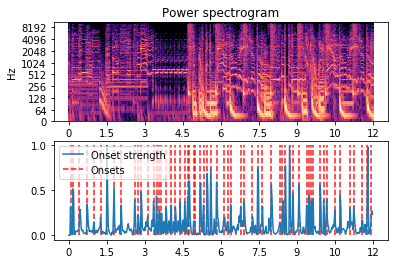

In [31]:
y, sr = librosa.load(filename,offset=30, duration=12.0)
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.stft(y))
plt.figure()
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
            linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

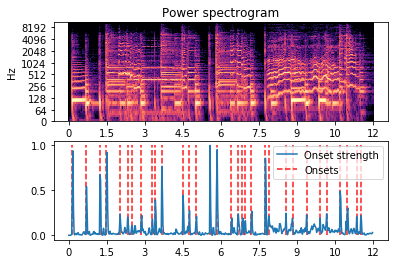

In [32]:
y, sr = librosa.load(filename,duration=12.0)
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.stft(y))
plt.figure()
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
            linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

# DWI File Information

The gap is the time separating the beginning of the song and the first beat.



# Installation Information

In [ ]:
#https://www.youtube.com/watch?v=xcdTIDHm4KM

In [ ]:
#Need to install this file to make this work
#https://ffmpeg.zeranoe.com/builds/ 


In [5]:
#https://librosa.github.io/librosa/generated/librosa.beat.tempo.html